# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [38]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact, interactive, fixed, interact_manual

In [39]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(map_box_api)

(sfo_neighborhoods_census['year', 'neighborhood'])# Import Data

In [40]:
# Import the necessary CSVs to Pandas DataFrames
nb_coordinates = pd.read_csv(
    Path("neighborhoods_coordinates.csv")
 )
nb_coordinates

sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv"), 
    index_col='year'
)

sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()

sfo_neighborhoods_census

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [41]:
# Define Panel Visualization Functions
def housing_units_per_year():
    
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    sf_housing_units_mean = sfo_neighborhoods_census['housing_units'].groupby(sfo_neighborhoods_census['year']).mean()
    min = sfo_neighborhoods_census.min()['housing_units']
    max = sfo_neighborhoods_census.max()['housing_units']
    
    housing_plot = sf_housing_units_mean.plot.bar(
    ylim=(min-3000, max + 3000), 
    title= "SF Mean Housing Units Sold 2010-2016", figsize = (12,8))
    
    
    return housing_plot

def average_gross_rent():
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    
    average_sale_price_df = sfo_neighborhoods_census['gross_rent'].groupby(sfo_neighborhoods_census['year']).mean()
    
    average_rent_plot = average_sale_price_df.plot.line(title="Average Gross Rent in SF per year")
  
    return average_rent_plot




def average_sales_price():
    
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    
    average_sale_price_df = sfo_neighborhoods_census['sale_price_sqr_foot'].groupby(sfo_neighborhoods_census['year']).mean()
    
    average_price_plot = average_sale_price_df.plot.line(title="Average Sales Price per Year")
  
    return average_price_plot

      
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    avg_price_neighborhood_data = sfo_neighborhoods_census.groupby(['year','neighborhood']).mean() 
    
    avg_price_neighborhood_data = avg_price_neighborhood_data.hvplot.bar("year", ["sale_price_sqr_foot", "gross_rent"], groupby= "neighborhood", width= 1700, height= 500)
    

    return avg_price_neighborhood_data
    


def parallel_coordinates():
    """Parallel Coordinates Plot."""
 
    
    avg_value_per_neighborhood = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census["neighborhood"]]).mean()  
    
    top_ten_expensive_neighborhood = avg_value_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
    
    top_ten_parallel_coordinates = px.parallel_coordinates(
        top_ten_expensive_neighborhood,
        color="sale_price_sqr_foot",
        title="Parallel Coordinates of Most Expensive Neighborhoods in San Francisco"
    )
    
    return top_ten_parallel_coordinates



def parallel_categories():
    """Parallel Categories Plot."""
    
    avg_value_per_neighborhood = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census["neighborhood"]]).mean()  
    top_ten_expensive_neighborhood = avg_value_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()     #I could have done sort_values(ascending=False, by = 'sale_price_sqr_foot' like in the rental analysis but it gives an error
                                                                                                                                
    
    top_ten_parallel_categories = px.parallel_categories(
    top_ten_expensive_neighborhood,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)
    
    return top_ten_parallel_categories


def neighborhood_map():
    neighborhood_location_df = pd.read_csv(
        Path("neighborhoods_coordinates.csv")
    )
    avg_value_neighborhood = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census["neighborhood"]]).mean()  
    avg_value_neighborhood = avg_value_neighborhood.reset_index()
    avg_value_location_combined = pd.concat([avg_value_neighborhood, neighborhood_location_df], axis="columns", join="inner")

    location_mapbox = px.scatter_mapbox(
    avg_value_location_combined,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.Edge,
    title="Average rent by neighborhood in SF",
    zoom=11,
    width=800,
)
    return location_mapbox

def average_price_by_neighborhood():
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv"), 
    index_col='year'
    )

    new_sfo_data = sfo_neighborhoods_census.groupby(["year", "neighborhood"]).mean()

    new_sfo_data = pd.DataFrame(new_sfo_data)

    new_sfo_data = new_sfo_data['gross_rent'].hvplot(
        xlabel='year',
        ylabel='gross rent',
        label=' ',
        groupby='neighborhood',
        height=300,
        width=600,
    )

    return new_sfo_data
  
  
  


  
def top_most_expensive_neighborhoods():
  
    """Top 10 Most Expensive Neighborhoods."""
    top_most_expensive = sfo_neighborhoods_census.groupby(sfo_neighborhoods_census['neighborhood']).mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)
    
    top_most_expensive = top_most_expensive.reset_index()
    
    top_most_expensive_df_plot = pd.DataFrame(top_most_expensive)
    
    top_most_expensive_df_plot = top_most_expensive_df_plot.hvplot.bar(
        x= "neighborhood",
        y= "sale_price_sqr_foot",
        title= "10 Most Expensive Neighborhoods in San Francisco, CA",
        height=350,
        rot= 45
    )

    
    return top_most_expensive_df_plot  




def sunburst():

    df_expensive_neighborhoods_per_year = sfo_neighborhoods_census.sort_values(ascending=False, by ='sale_price_sqr_foot') 
    
    sunburst_data= px.sunburst(
        df_expensive_neighborhoods_per_year,
        path = ["year","neighborhood"],
        values = "sale_price_sqr_foot",
        color="gross_rent", 
        hover_data=["gross_rent"],
        color_continuous_scale="blues",
        height = 700
        
    )
    return sunburst_data


    
   


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

## Serve the Panel Dashboard

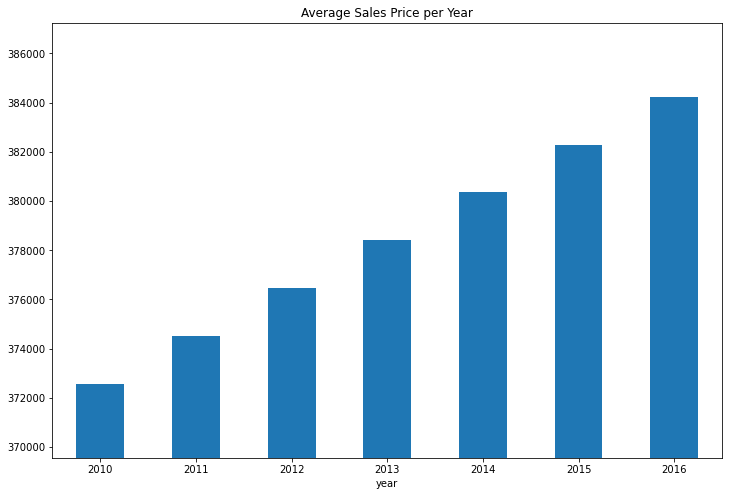

In [42]:
title = "Real Estate Data of San Francisco from 2010-2016"


# Create a tab layout for the dashboard
#welcome = pn.Row(pn.Column(title), neighborhood_maps())
welcome_tab = pn.Row(pn.Column(title), neighborhood_map())
yearly_market_analysis_tab = pn.Column(housing_units_per_year(), average_gross_rent(), average_sales_price())

neighborhood_analyis_tab = pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())

parallel_plots_analysis_tab = pn.Column(
    parallel_categories(),
    parallel_coordinates()
)

sunburst_tab = pn.Column(sunburst())


# Create the dashboard
san_francisco_dashboard = pn.Tabs(("Welcome", welcome_tab),
    ("Yearly Market Analysis", yearly_market_analysis_tab),
    ("Neighborhood Analysis", neighborhood_analyis_tab),
    ("Interactive Market Analysis by Neighborhood", parallel_plots_analysis_tab),
    ("Sunburst", sunburst_tab)
)


sf_market_plots = pn.Column(
    '## San Francisco housing market overview',
    housing_units_per_year(),
    average_gross_rent(),
    average_sales_price()
)

neighborhood_plots = pn.Column(
    '## San Francisco neighborhoods overview',
    average_price_by_neighborhood(),
    top_most_expensive_neighborhoods(),
)


neighborhood_maps = pn.Column(
    '## Neighborhood maps',
    neighborhood_map()
)


parallel_plots = pn.Column(
    '## Parallel plots',
    parallel_categories(),
    parallel_coordinates(),
)


In [43]:
# Serve the# dashboard
san_francisco_dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'7b4dc2c1-f394-4b8b-9b3c-ab394844c6c4': {'defs': …

Tabs
    [0] Row
        [0] Column
            [0] Markdown(str)
        [1] Plotly(Figure)
    [1] Column
        [0] Str(AxesSubplot)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [2] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [4] Column
        [0] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

<AxesSubplot:title={'center':'SF Mean Housing Units Sold 2010-2016'}, xlabel='year'>

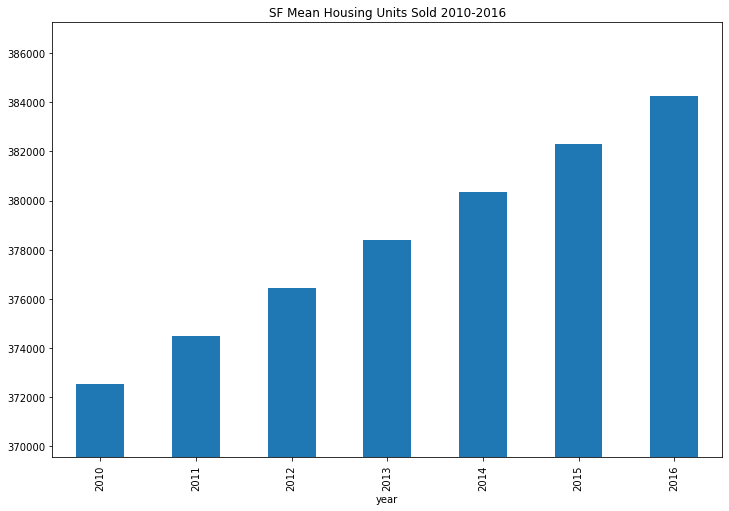

In [44]:
# housing_units_per_year()
def housing_units_per_year():
    
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    sf_housing_units_mean = sfo_neighborhoods_census['housing_units'].groupby(sfo_neighborhoods_census['year']).mean()
    min = sfo_neighborhoods_census.min()['housing_units']
    max = sfo_neighborhoods_census.max()['housing_units']
    
    housing_plot = sf_housing_units_mean.plot.bar(
    ylim=(min-3000, max + 3000), 
    title= "SF Mean Housing Units Sold 2010-2016", figsize = (12,8))
    
    
    return housing_plot

housing_units_per_year()

<AxesSubplot:title={'center':'Average Gross Rent in SF per year'}, xlabel='year'>

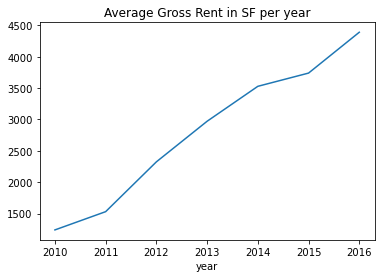

In [45]:
# average_gross_rent()


def average_gross_rent():
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    
    average_sale_price_df = sfo_neighborhoods_census['gross_rent'].groupby(sfo_neighborhoods_census['year']).mean()
    
    average_rent_plot = average_sale_price_df.plot.line(title="Average Gross Rent in SF per year")
  
    return average_rent_plot
average_gross_rent()

<AxesSubplot:title={'center':'Average Sales Price per Year'}, xlabel='year'>

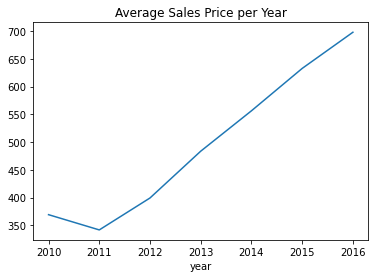

In [46]:
# average_sales_price()
def average_sales_price():
    
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv")
    )
    sfo_neighborhoods_census = sfo_neighborhoods_census.reset_index()
    
    average_sale_price_df = sfo_neighborhoods_census['sale_price_sqr_foot'].groupby(sfo_neighborhoods_census['year']).mean()
    
    average_price_plot = average_sale_price_df.plot.line(title="Average Sales Price per Year")
  
    return average_price_plot

average_sales_price()





In [47]:
# average_price_by_neighborhood()
def average_price_by_neighborhood():
    sfo_neighborhoods_census = pd.read_csv(
    Path("sfo_neighborhoods_census_data.csv"), 
    index_col='year'
    )

    new_sfo_data = sfo_neighborhoods_census.groupby(["year", "neighborhood"]).mean()

    new_sfo_data = pd.DataFrame(new_sfo_data)

    new_sfo_data = new_sfo_data['gross_rent'].hvplot(
        xlabel='year',
        ylabel='gross rent',
        label=' ',
        groupby='neighborhood',
        height=300,
        width=600,
    )

    return new_sfo_data

average_price_by_neighborhood()


BokehModel(combine_events=True, render_bundle={'docs_json': {'630dd718-e50e-4597-9d6d-22618c07a17a': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

In [48]:
# top_most_expensive_neighborhoods()
def top_most_expensive_neighborhoods():
  
    """Top 10 Most Expensive Neighborhoods."""
    top_most_expensive = sfo_neighborhoods_census.groupby(sfo_neighborhoods_census['neighborhood']).mean().sort_values(ascending=False, by= 'sale_price_sqr_foot').head(10).drop('year', axis=1)
    
    top_most_expensive = top_most_expensive.reset_index()
    
    top_most_expensive_df_plot = pd.DataFrame(top_most_expensive)
    
    top_most_expensive_df_plot = top_most_expensive_df_plot.hvplot.bar(
        x= "neighborhood",
        y= "sale_price_sqr_foot",
        title= "10 Most Expensive Neighborhoods in San Francisco, CA",
        height=350,
        rot= 45
    )

    
    return top_most_expensive_df_plot  

top_most_expensive_neighborhoods()



:Bars   [neighborhood]   (sale_price_sqr_foot)

In [49]:
# most_expensive_neighborhoods_rent_sales
def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    avg_price_neighborhood_data = sfo_neighborhoods_census.groupby(['year','neighborhood']).mean() 
    
    avg_price_neighborhood_data = avg_price_neighborhood_data.hvplot.bar("year", ["sale_price_sqr_foot", "gross_rent"], groupby= "neighborhood", width= 1700, height= 500)
    

    return avg_price_neighborhood_data

most_expensive_neighborhoods_rent_sales()

BokehModel(combine_events=True, render_bundle={'docs_json': {'05013f9f-b7cf-476a-a8c7-cb586c5a0ea8': {'defs': …

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [50]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
 
    
    avg_value_per_neighborhood = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census["neighborhood"]]).mean()  
    
    top_ten_expensive_neighborhood = avg_value_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
    
    top_ten_parallel_coordinates = px.parallel_coordinates(
        top_ten_expensive_neighborhood,
        color="sale_price_sqr_foot",
        title="Parallel Coordinates of Most Expensive Neighborhoods in San Francisco"
    )
    
    return top_ten_parallel_coordinates

parallel_coordinates()

In [51]:
# parallel_coordinates()

def parallel_categories():
    """Parallel Categories Plot."""
    
    avg_value_per_neighborhood = sfo_neighborhoods_census.groupby([sfo_neighborhoods_census["neighborhood"]]).mean()  
    top_ten_expensive_neighborhood = avg_value_per_neighborhood.nlargest(10, 'sale_price_sqr_foot').reset_index()
    
    top_ten_parallel_categories = px.parallel_categories(
    top_ten_expensive_neighborhood,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)
    
    return top_ten_parallel_categories

parallel_categories()

In [52]:
# sunburst()


def sunburst():

    df_expensive_neighborhoods_per_year = sfo_neighborhoods_census.sort_values(ascending=False, by ='sale_price_sqr_foot') 
    
    sunburst_data= px.sunburst(
        df_expensive_neighborhoods_per_year,
        path = ["year","neighborhood"],
        values = "sale_price_sqr_foot",
        color="gross_rent", 
        hover_data=["gross_rent"],
        color_continuous_scale="blues",
        height = 700
        
    )
    return sunburst_data

sunburst()

In [53]:
sfo_neighborhoods_census


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390
